CE080_Vedant_Parikh

Machine Learning

Lab : 02

**HandlingMissingValues**

In [ ]:
import numpy as np 
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
datasets = pd.read_csv('/content/drive/MyDrive/exercise-car-data.csv') 
print("\nData :\n", datasets)
print("\nData statistics\n", datasets.describe())


Data :
       Index  Price   Age     KM  ... Automatic    CC  Doors  Weight
0         0  13500  23.0  46986  ...         0  2000  three    1165
1         1  13750  23.0  72937  ...         0  2000      3    1165
2         2  13950  24.0  41711  ...         0  2000      3    1165
3         3  14950  26.0  48000  ...         0  2000      3    1165
4         4  13750  30.0  38500  ...         0  2000      3    1170
...     ...    ...   ...    ...  ...       ...   ...    ...     ...
1431   1431   7500   NaN  20544  ...         0  1300      3    1025
1432   1432  10845  72.0     ??  ...         0  1300      3    1015
1433   1433   8500   NaN  17016  ...         0  1300      3    1015
1434   1434   7250  70.0     ??  ...         0  1300      3    1015
1435   1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]

Data statistics
              Index         Price  ...           CC      Weight
count  1436.000000   1436.000000  ...  1436.000000  1436.00000
mean 

In [ ]:
# All rows, all columns except last 
X = datasets.iloc[:, :-1].values 
  
# Only last column  
Y = datasets.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 



Input : 
 [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


In [ ]:
#removing row with all null value
datasets.dropna(axis = 1, how = 'all', inplace = True)
print("\nNew Data :", datasets)


New Data :       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]


In [ ]:
# Removing the row with any one null values

datasets.dropna(axis = 0, how = 'any', inplace = True)
print("\nNew Data :",datasets)
datasets = datasets.replace(to_replace = "??", value = 50000)

datasets = datasets.replace(to_replace = "three", value = 3)
print("\nNew Data :",datasets)


New Data :       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
5              5  12950  32.0  61000  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1425        1425   7950  80.0     ??  ...         0  1300      4    1000
1429        1429   8950  78.0  24000  ...         1  1300      5    1065
1430        1430   8450  80.0  23000  ...         0  1300      3    1015
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1111 rows x 11 columns]

New Data :       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0

**DataTransformation**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# All rows, all columns except last 
X = datasets.iloc[:, :-1].values 
  
# Only last column  
Y = datasets.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 

X_new = datasets.iloc[:,1:4].values
print("\n\nX for transformation : \n", X_new)



Input : 
 [[0 13500 23.0 ... 0 2000 3]
 [1 13750 23.0 ... 0 2000 '3']
 [3 14950 26.0 ... 0 2000 '3']
 ...
 [1430 8450 80.0 ... 0 1300 '3']
 [1432 10845 72.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


X for transformation : 
 [[13500 23.0 '46986']
 [13750 23.0 '72937']
 [14950 26.0 '48000']
 ...
 [8450 80.0 '23000']
 [10845 72.0 50000]
 [6950 76.0 '1']]


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.33983287 0.27848101 0.19335471]
 [0.34911792 0.27848101 0.30014938]
 [0.39368617 0.3164557  0.19752756]
 ...
 [0.15227484 1.         0.09464648]
 [0.24122563 0.89873418 0.20575805]
 [0.09656453 0.94936709 0.        ]]


In [ ]:
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.73687953 -1.73138817 -0.58258384]
 [ 0.80448309 -1.73138817  0.10178722]
 [ 1.12898017 -1.57198932 -0.55584297]
 ...
 [-0.62871237  1.29719009 -1.21513458]
 [ 0.01892973  0.87212647 -0.50309964]
 [-1.03433373  1.08465828 -1.82165648]]


**HandlingCategoricalData**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
print("\nData :\n", datasets)
print("\nData statistics\n", datasets.describe())


Data :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000      3    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
5              5  12950  32.0  61000  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1425        1425   7950  80.0  50000  ...         0  1300      4    1000
1429        1429   8950  78.0  24000  ...         1  1300      5    1065
1430        1430   8450  80.0  23000  ...         0  1300      3    1015
1432        1432  10845  72.0  50000  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1111 rows x 11 columns]

Data statistics
         Unnamed: 0         Price  ...           CC       Weight
count  

In [ ]:
# All rows, all columns except last 
X = datasets.iloc[:, :-1].values 
  
# Only last column  
Y = datasets.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y)



Input : 
 [[0 13500 23.0 ... 0 2000 3]
 [1 13750 23.0 ... 0 2000 '3']
 [3 14950 26.0 ... 0 2000 '3']
 ...
 [1430 8450 80.0 ... 0 1300 '3']
 [1432 10845 72.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


In [ ]:
le = LabelEncoder()
X[ : ,4] = le.fit_transform(X[ : ,4])
print("\n\nInput : \n", X) 

print(X[:,4])



Input : 
 [[0 13500 23.0 ... 0 2000 3]
 [1 13750 23.0 ... 0 2000 '3']
 [3 14950 26.0 ... 0 2000 '3']
 ...
 [1430 8450 80.0 ... 0 1300 '3']
 [1432 10845 72.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]
[1 1 1 ... 2 2 2]


In [ ]:
dummy = pd.get_dummies(datasets['FuelType'])
print("\n\nDummy :\n",dummy)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
3       0       1       0
4       0       1       0
5       0       1       0
...   ...     ...     ...
1425    0       0       1
1429    0       0       1
1430    0       0       1
1432    0       0       1
1435    0       0       1

[1111 rows x 3 columns]


In [ ]:
datasets = datasets.drop(['FuelType'], axis = 1)
datasets = pd.concat([dummy, datasets], axis = 1)
print("\n\nFinal Data :\n", datasets)



Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  ...  Automatic    CC Doors Weight
0       0       1       0           0  ...          0  2000     3   1165
1       0       1       0           1  ...          0  2000     3   1165
3       0       1       0           3  ...          0  2000     3   1165
4       0       1       0           4  ...          0  2000     3   1170
5       0       1       0           5  ...          0  2000     3   1170
...   ...     ...     ...         ...  ...        ...   ...   ...    ...
1425    0       0       1        1425  ...          0  1300     4   1000
1429    0       0       1        1429  ...          1  1300     5   1065
1430    0       0       1        1430  ...          0  1300     3   1015
1432    0       0       1        1432  ...          0  1300     3   1015
1435    0       0       1        1435  ...          0  1600     5   1114

[1111 rows x 13 columns]


In [ ]:
onehotencoder = OneHotEncoder()
datasets = pd.read_csv('/content/drive/MyDrive/exercise-car-data.csv') 
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(datasets.FuelType.values.reshape(-1, 1)).toarray()
print(x)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [ ]:
dfOneHot = pd.DataFrame(x, columns = ["FuelType_"+str(int(i)) for i in range(4)]) 
df = pd.concat([datasets, dfOneHot], axis = 1) #column
df= df.drop(['FuelType'], axis = 1)
print(df.head())

   Index  Price   Age     KM  ... FuelType_0  FuelType_1  FuelType_2  FuelType_3
0      0  13500  23.0  46986  ...        0.0         1.0         0.0         0.0
1      1  13750  23.0  72937  ...        0.0         1.0         0.0         0.0
2      2  13950  24.0  41711  ...        0.0         1.0         0.0         0.0
3      3  14950  26.0  48000  ...        0.0         1.0         0.0         0.0
4      4  13750  30.0  38500  ...        0.0         1.0         0.0         0.0

[5 rows x 14 columns]


In [ ]:
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/exercise-car-data.csv')
data.head()

,Index,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [ ]:
corr = data.corr()
corr.head()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
Unnamed: 0,1.000000,-0.738289,0.907090,-0.078616,0.066299,-0.184490,-0.414577
Price,-0.738289,1.000000,-0.878407,0.112041,0.033081,0.165067,0.581198
Age,0.907090,-0.878407,1.000000,-0.099659,0.032573,-0.120706,-0.464299
MetColor,-0.078616,0.112041,-0.099659,1.000000,-0.013973,0.029189,0.057142
Automatic,0.066299,0.033081,0.032573,-0.013973,1.000000,-0.069321,0.057249


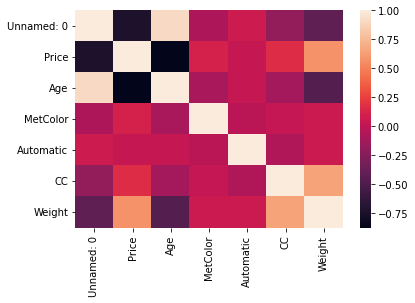

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = data.columns[j + 1]
print(selected_columns)

Automatic


In [ ]:
data = data[selected_columns]
print(data)

0       0
1       0
2       0
3       0
4       0
       ..
1431    0
1432    0
1433    0
1434    0
1435    0
Name: Automatic, Length: 1436, dtype: int64
